<a href="https://colab.research.google.com/github/rajitakolla/computational_methods/blob/master/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

# Write your code here
import numpy as np
import pandas as pd
import sklearn as sk

In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import pandas_profiling as pf
import matplotlib as mat
from pandas_profiling import ProfileReport
%matplotlib inline

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install pandas==0.25

In [ ]:
df=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
df.head()
df = df.dropna()

In [ ]:
report = pf.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [ ]:
report

Number of variables,7
Number of observations,334335
Total Missing (%),0.0%
Total size in memory,17.9 MiB
Average record size in memory,56.0 B
Numeric,4
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [ ]:
columns_to_be_delted=report.get_rejected_variables()

In [ ]:
df.drop(columns_to_be_delted,axis=1,inplace=True)

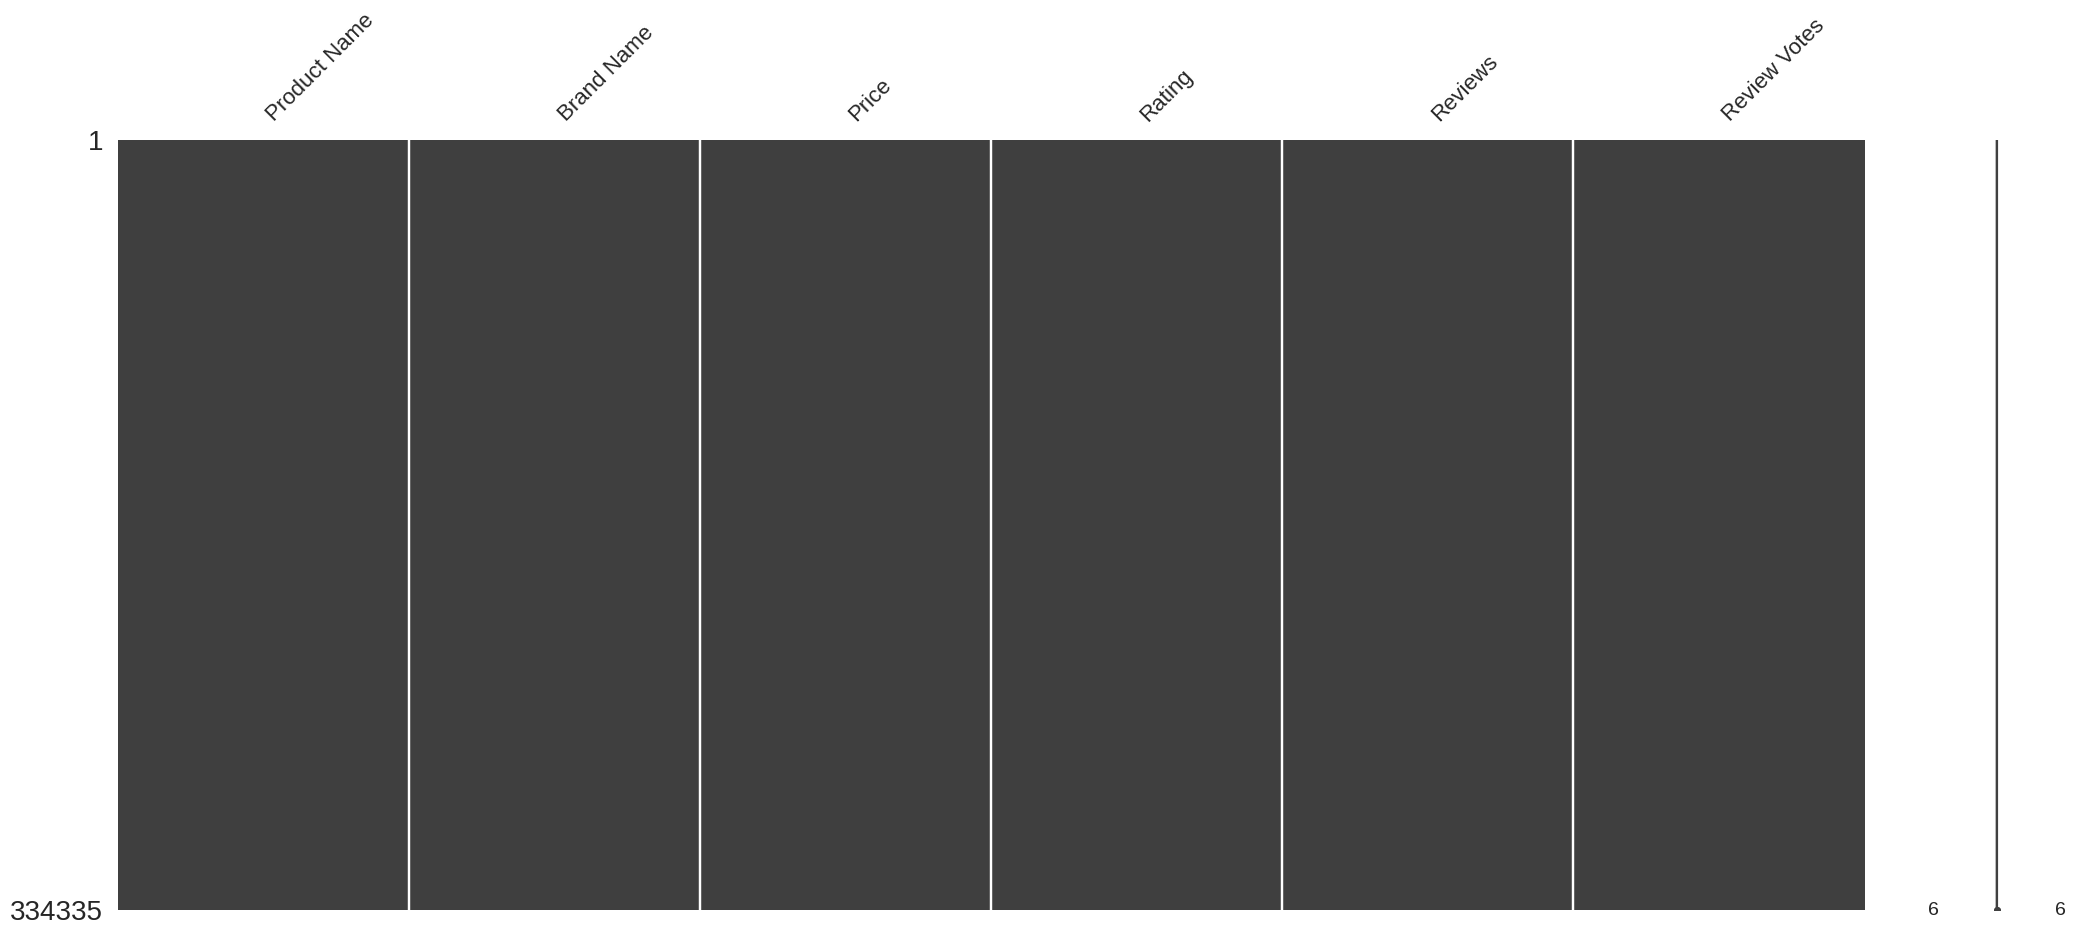

In [ ]:
msno.matrix(df) 

In [ ]:
df.corr()

,Price,Rating,Review Votes
Price,1.000000,0.073948,0.022164
Rating,0.073948,1.000000,-0.046526
Review Votes,0.022164,-0.046526,1.000000


In [ ]:
df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
list_of_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["Reviews"] = df["Reviews"].apply(lambda x : x.lower()).to_frame()
df["Reviews"] = df["Reviews"].apply(lambda x:''.join([i for i in x if i not in string.punctuation])).to_frame()
df["Reviews"] = df["Reviews"].apply(lambda x:' '.join([i for i in x.split() if i not in list_of_words])).to_frame()

In [ ]:
frequent_words = list(pd.Series(' '.join(df['Reviews']).split()).value_counts()[:15].index)
#top 15 rare words
rare_words = list(pd.Series(' '.join(df['Reviews']).split()).value_counts()[-15:].index)

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
df["Reviews"] = df["Reviews"].apply(lambda x: ' '.join([i for i in x.split() if i not in frequent_words])).to_frame()

In [ ]:
df["Reviews"] = df["Reviews"].apply(lambda x: ' '.join([i for i in x.split() if i not in rare_words])).to_frame()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import textblob
ps = PorterStemmer() 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk import word_tokenize
df["Reviews"] = df["Reviews"].apply(lambda x: ' '.join(word_tokenize(str(x)))).to_frame()

#**K MEANS**

In [ ]:
kmeans_df = df[["Reviews","Rating"]]

In [ ]:
kmeans_df = kmeans_df.head(1000)

In [ ]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
vectorizer = count_vect.fit_transform(kmeans_df['Reviews'].values)
vectorizer.shape

(1000, 5018)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(algorithm='auto', copy_x=True, init= 'k-means++', max_iter=300,n_clusters=5, n_init=5, n_jobs=1, precompute_distances='auto' ,random_state=None, tol=0.0001, verbose=0)
model.fit(vectorizer)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=5, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
X=kmeans_df.values

In [ ]:
from sklearn import metrics
metrics.silhouette_score(vectorizer, model.labels_, metric='euclidean')

0.5491467703430751

In [ ]:
kmeans_df["cluster number"] = model.labels_

In [ ]:
kmeans_df.head(5)

,Reviews,Rating,cluster number
0,feel lucky found used us used hard line someon...,5,0
1,nice nice grade pantach revue clean set easy s...,4,0
2,pleased,5,0
3,goes slow sometimes,4,0
4,replace lost thing volume button still go sett...,4,0


In [ ]:
vectorizer

<1000x5018 sparse matrix of type '<class 'numpy.int64'>'
	with 25560 stored elements in Compressed Sparse Row format>

In [ ]:
centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(5):
    tokens = [count_vect.get_feature_names()[i] for i in centroids[i, :5]]
    print('CLUSTER NUMBER'+str(i+1))
    print('TOKENS:', tokens,"\n\n\n")
    

CLUSTER NUMBER1
TOKENS: ['price', 'dont', 'bought', 'buy', 'nice'] 



CLUSTER NUMBER2
TOKENS: ['sim', 'card', 'also', 'price', 'camera'] 



CLUSTER NUMBER3
TOKENS: ['camera', 'quality', 'sound', 'light', 'idol'] 



CLUSTER NUMBER4
TOKENS: ['back', 'wifi', 'camera', '4g', 'tracfone'] 



CLUSTER NUMBER5
TOKENS: ['im', 'issue', 'amazon', 'old', 'network'] 





#**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
DBSCAN_df = df[["Reviews","Rating"]].head(1000)

In [ ]:
count_vect_dbScan = CountVectorizer()
vectorizer_dbScan = count_vect_dbScan.fit_transform(DBSCAN_df['Reviews'].values)
vectorizer_dbScan.shape

(1000, 5018)

In [ ]:
model1 = DBSCAN(eps=13, min_samples=3).fit(vectorizer_dbScan)

In [ ]:
metrics.silhouette_score(vectorizer_dbScan, model1.labels_, metric='euclidean')

0.5653006994102693

In [ ]:
np.unique(model1.labels_)

array([-1,  0,  1,  2,  3])

In [ ]:
model1

DBSCAN(algorithm='auto', eps=13, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [ ]:
tkns = list()

for i in DBSCAN_df["Reviews"]:
  tkns.append(i.split())


In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec(tkns, size=1, workers=5)

In [ ]:

sent_vectors = list(); # the avg-w2v for each sentence/review is stored in this train
count = 0;
for sent in tkns: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =1; # num of words with a valid vector in the sentence/review
    count = count+1
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
# sent_vectors.shape

In [ ]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [ ]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
res1 = sent_vectors[:1000]

In [ ]:
for val in sent_vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, res1) )
twohundrethneigh.sort()

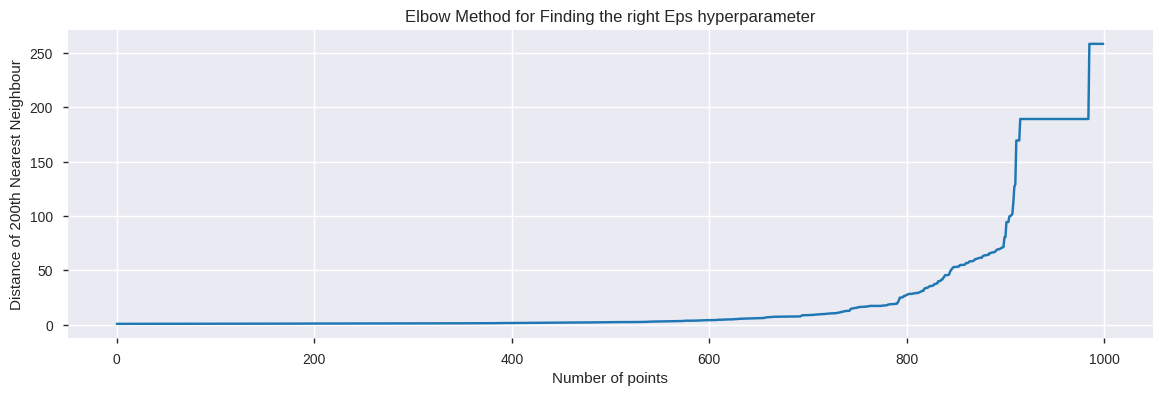

In [ ]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
model2 = DBSCAN(eps = 50, min_samples = 200, n_jobs=-1, algorithm='auto',metric='euclidean',metric_params=None, p=None).fit(sent_vectors)
DBSCAN_df['DBSCAN Cluster Labels'] = model2.labels_
# Finding the number of reviews in each cluster
print(DBSCAN_df.groupby(['DBSCAN Cluster Labels'])['Reviews'].count())

DBSCAN Cluster Labels
0    1000
Name: Reviews, dtype: int64


In [ ]:
DBSCAN_df.head(2)

,Reviews,Rating,DBSCAN Cluster Labels
0,feel lucky found used us used hard line someon...,5,0
1,nice nice grade pantach revue clean set easy s...,4,0


#**Hierarchical Clusters**

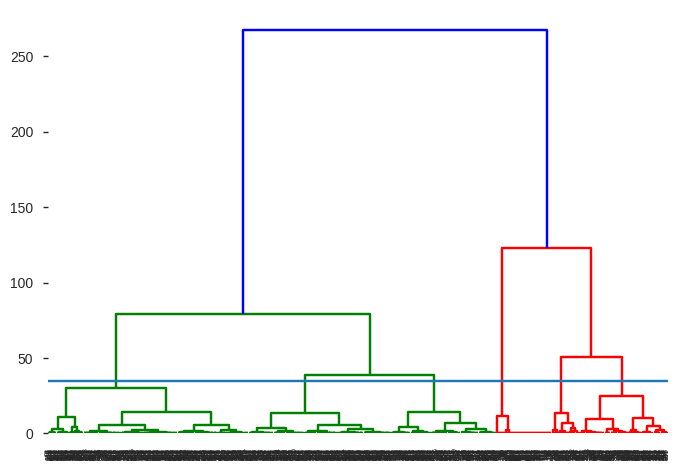

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'),orientation = "right")
plt.axhline(y=35)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model3 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  #took n=6 from dendrogram curve 
model3.fit_predict(sent_vectors)

array([2, 2, 4, 1, 2, 0, 3, 2, 0, 3, 1, 0, 2, 0, 2, 2, 0, 3, 0, 3, 3, 0,
       2, 2, 0, 1, 3, 4, 4, 0, 1, 0, 0, 0, 3, 2, 3, 1, 2, 1, 5, 5, 1, 1,
       2, 5, 1, 4, 5, 4, 4, 1, 0, 5, 0, 1, 1, 0, 5, 3, 5, 4, 4, 3, 0, 5,
       5, 0, 2, 0, 2, 4, 3, 5, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 5,
       0, 3, 1, 1, 5, 1, 2, 2, 1, 2, 0, 3, 5, 2, 5, 2, 5, 3, 3, 3, 2, 2,
       5, 2, 2, 0, 4, 0, 0, 0, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 5, 5, 4, 5,
       1, 0, 3, 2, 5, 1, 3, 3, 0, 2, 2, 2, 1, 3, 3, 0, 3, 1, 3, 3, 2, 1,
       2, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 3, 1, 0, 2, 3, 3, 5, 3, 3, 2,
       2, 5, 5, 4, 2, 0, 4, 1, 2, 0, 3, 2, 2, 3, 3, 3, 3, 5, 4, 0, 3, 3,
       0, 2, 2, 2, 2, 1, 3, 3, 1, 3, 0, 0, 0, 5, 5, 0, 1, 2, 4, 0, 3, 1,
       3, 3, 1, 0, 2, 2, 3, 1, 0, 0, 1, 2, 4, 3, 3, 2, 1, 3, 3, 3, 0, 5,
       5, 4, 2, 0, 4, 1, 2, 0, 3, 0, 0, 5, 0, 1, 0, 1, 3, 3, 5, 1, 3, 1,
       1, 4, 3, 0, 0, 3, 3, 0, 3, 3, 2, 2, 2, 3, 0, 3, 3, 4, 1, 2, 0, 5,
       1, 0, 3, 5, 4, 2, 5, 0, 3, 3, 1, 4, 2, 2, 5,

In [ ]:
# Giving Labels/assigning a cluster to each point/text 
hierarchial_cluster_df = df["Reviews"].head(1000).to_frame()
hierarchial_cluster_df['AVG-W2V Clus Label'] = cluster.labels_
hierarchial_cluster_df.head(10)

,Reviews,AVG-W2V Clus Label
0,feel lucky found used us used hard line someon...,0
1,nice nice grade pantach revue clean set easy s...,0
2,pleased,4
3,goes slow sometimes,3
4,replace lost thing volume button still go sett...,0
5,already problems know stated used dang state c...,1
6,charging port loose got soldered needed well 1...,0
7,looks wouldnt stay charged buy still couldnt s...,0
8,originally using samsung s2 galaxy sprint want...,1
9,life responsive touch issue sometimes goes bla...,0


In [ ]:
hierarchial_cluster_df.groupby(['AVG-W2V Clus Label'])["Reviews"].count()

AVG-W2V Clus Label
0    400
1    323
2     89
3    142
4     46
Name: Reviews, dtype: int64

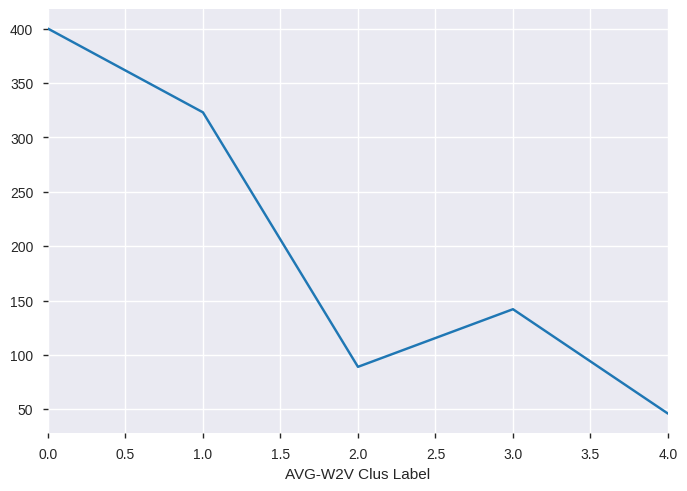

In [ ]:
#find the number of points in each cluster
hierarchial_cluster_df.groupby(['AVG-W2V Clus Label'])["Reviews"].count().plot()

In one paragraph, please compare K means, DBSCAN and Heirarchial Clustering

From my observations I beleive that K means will work effectively with large number of datasets. The DBSCAN will have huge time complexity and it is not effective when come to handling large unlabelled datasets. In heirarchial clustering the clusters are divided unevenly. In K Means the clusters are uniformly divided. For the reviews data set we consider that the K MEANS algorithm is best for analysis